In [156]:
%load_ext autoreload
%autoreload 2
%aimport -pylab
%pylab inline
from ipywidgets import interact

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [5]:
import poppy
import astropy.units as u

### Interferomètres thorlabs : 

* 6.35 mm d'épaisseur (e)
* 18 arcsec de wedge ($\theta$)

**le décalage s est :**

$s = e/n$

ou n est l'indice de réfraction du matériau

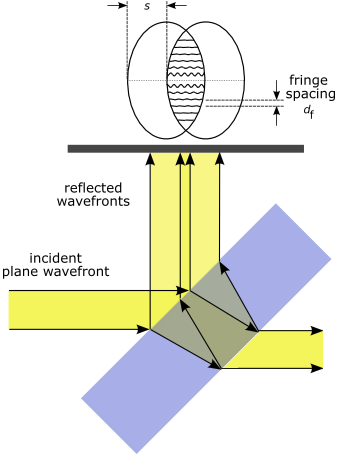

Quelques formules de wikipedia : 

**distance entre les franges (projeté dans la direction du wedge):**
$$ d_f = \frac{\lambda}{2 n \theta} $$

**Rayon de courbure en fonction de $\gamma$ l'ange des franges par rapport au wedge**

$$ {\displaystyle R=-{\frac {s\cdot d_{f}}{\lambda \tan \gamma }}}$$

In [42]:
6.35/1.515

4.191419141914191

In [43]:
1024/20*4.2

215.04000000000002

In [59]:
18*5e-6*20e-3

1.8000000000000001e-06

In [164]:
def shear_plate(defoc,ast90,ast45,coma0,coma90):
    """
    un suppose une pupille de 20 mm
    une épaisseur de 6.35 mm
    1024 pixel => 20 mm
    18 arcsec de wedge
    
    on pose de dispositif dans deux orientations ortogonales 
    
    """
    optic = poppy.ZernikeWFE(radius=1*u.cm,
                            coefficients=[0, 0, 0, defoc*1e-6, ast45*1e-6, ast90*1e-6, coma0*1e-6, coma90*1e-6],
                            aperture_stop=True)
    tilt = poppy.ZernikeWFE(radius=1*u.cm,
                            coefficients=[0, 1.8e-6/sqrt(2), 0, 0, 0, 0, 0],
                            aperture_stop=True)
    wave = poppy.Wavefront(wavelength = 0.635e-6,diam = 0.02)
    opd = optic.get_opd(wave) 
    opt = tilt.get_opd(wave) 
    tr = optic.get_transmission(wave)
    p1 = zeros((1024+215,1024),dtype = float)
    p2 = zeros((1024+215,1024),dtype = float)
    tr1 = zeros((1024+215,1024),dtype = float)
    tr2 = zeros((1024+215,1024),dtype = float)
    
    p3 = zeros((1024,1024+215),dtype = float)
    p4 = zeros((1024,1024+215),dtype = float)
    tr3 = zeros((1024,1024+215),dtype = float)
    tr4 = zeros((1024,1024+215),dtype = float)

    p1[0:1024,:] = opd
    p2[215:,:] = opd + opt
    tr1[0:1024,:] = tr
    tr2[215:,:] = tr
    
    p3[:,0:1024] = opd
    p4[:,215:] = opd + opt.T
    tr3[:,0:1024] = tr
    tr4[:,215:] = tr
    
    figure(figsize=(12,4))
    subplot(131)
    imshow(opd)
    title("Phase")
    subplot(132)
    imshow(tr1+tr2+2*sqrt(tr1*tr2)*cos(2*pi/635e-9*(p1-p2)))
    title("Inferferogramme dessus")
    subplot(133)
    imshow(tr3+tr4+2*sqrt(tr3*tr4)*cos(2*pi/635e-9*(p3-p4)))
    title("Interférogramme coté")

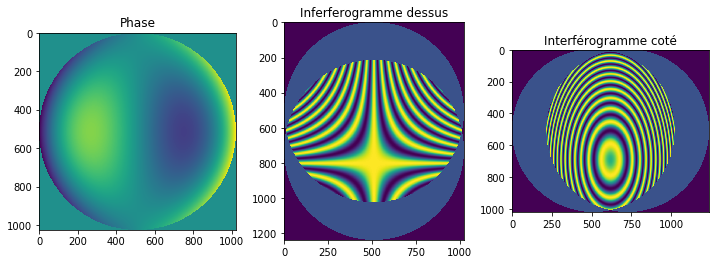

In [165]:
shear_plate(0,0,0,0,1)

## Version interactive

In [162]:
interact(shear_plate,defoc = 0.0, ast90 = 0.0, ast45 = 0.0,coma0 =0.0, coma90 =0.0)

interactive(children=(FloatSlider(value=0.0, description='defoc', max=1.0), FloatSlider(value=0.0, description…

<function __main__.shear_plate(defoc, ast90, ast45, coma0, coma90)>